<a href="https://colab.research.google.com/github/PedroOlavo/Bolsa_IC/blob/main/Testes_IC_gr%C3%A1ficos_e_correla%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analisar aspectos estatísticos dos sinais, sobretudo por meio dos boxplots.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
saudavel = pd.read_csv('/content/drive/MyDrive/BancodeDadosIC - Joelho/1Nmar.txt', sep="\s+")
saudavel.columns=['C1 - RF', 'C2 - VF', 'C3 - VM', 'C4 - ST', 'C5 - FX']
#peguei o individuo 1 saudavel

doente = pd.read_csv('/content/drive/MyDrive/BancodeDadosIC - Joelho/1Amar.txt', sep="\s+")
doente.columns=['C1 - RF', 'C2 - VF', 'C3 - VM', 'C4 - ST', 'C5 - FX']
#peguei o individuo 1 doente


In [ ]:
saudavel.describe()

,C1 - RF,C2 - VF,C3 - VM,C4 - ST,C5 - FX
count,5699.000000,5680.000000,5680.000000,5680.000000,5680.000000
mean,0.025427,-0.000291,-0.000103,-0.000391,19.353415
std,0.432667,0.008651,0.026424,0.011229,17.830984
min,-0.111000,-0.063000,-0.182300,-0.081800,1.300000
25%,-0.005300,-0.003800,-0.015000,-0.004600,6.900000
50%,0.000700,-0.000800,0.000000,-0.000800,11.500000
75%,0.006700,0.003000,0.012700,0.003000,28.025000
max,7.500000,0.112500,0.173200,0.114000,62.600000


In [ ]:
doente.describe()

,C1 - RF,C2 - VF,C3 - VM,C4 - ST,C5 - FX
count,12972.000000,12972.000000,12972.000000,12972.000000,12972.000000
mean,-0.000134,-0.000626,-0.000613,0.000685,-12.797163
std,0.083837,0.023586,0.068004,0.016246,16.379168
min,-1.271300,-0.329300,-0.612000,-0.150000,-57.200000
25%,-0.012800,-0.003000,-0.008300,-0.003000,-15.100000
50%,-0.000800,0.000000,-0.000800,0.001500,-7.100000
75%,0.011200,0.003700,0.008200,0.006700,-0.900000
max,1.360500,0.167200,0.595500,0.107200,3.100000


# Testes Canal 1

In [ ]:
len(saudavel['C1 - RF'])

5699

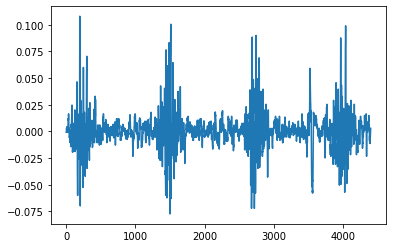

In [ ]:
#aqui quando peço pra plotar a coluna toda da um negócio estranho, lembrar de mostrar
#o problema começa na amostra 5681
#talvez seja interessante retirar esses pedaços com problema pra fazer a decomposição
(saudavel['C1 - RF'][:4400]).plot()

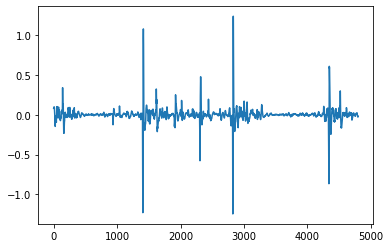

In [ ]:
doente['C1 - RF'][:4800].plot()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


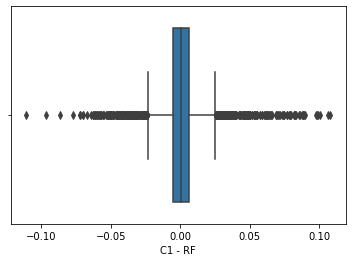

In [ ]:
#boxplot qnd não faz o tratamento daquels 19 amostras fica bastante estranho
sns.boxplot(saudavel['C1 - RF'][:5300])


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


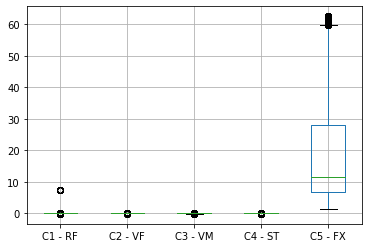

In [ ]:
saudavel.boxplot()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


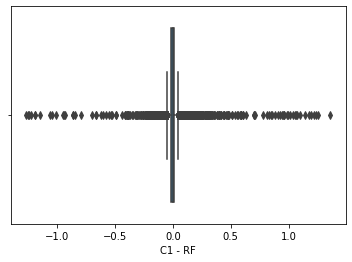

In [ ]:
sns.boxplot(doente['C1 - RF'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


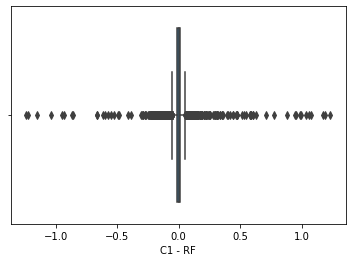

In [ ]:
sns.boxplot(doente['C1 - RF'][:5300], orient="v")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


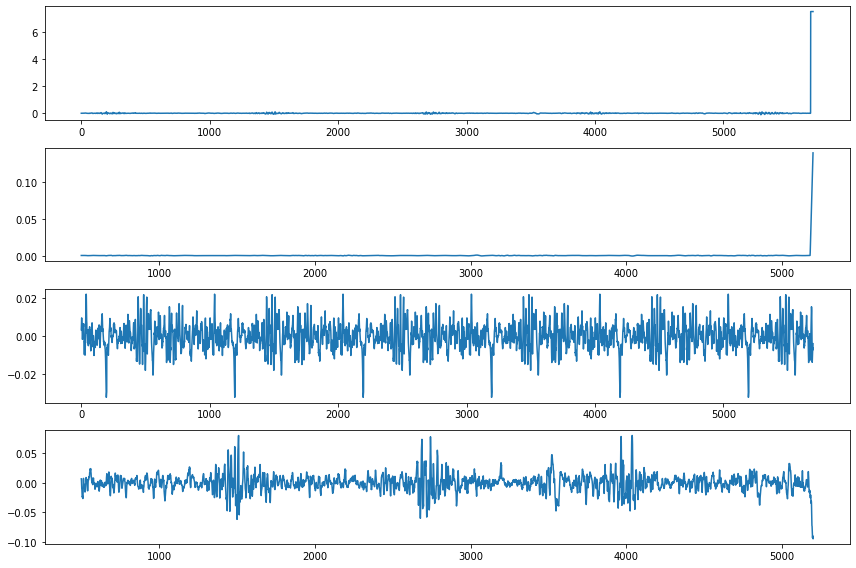

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(saudavel['C1 - RF'], freq = 1000)

fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(12,8))
result.observed.plot(ax=ax1)
result.trend.plot(ax=ax2)
result.seasonal.plot(ax=ax3)
result.resid.plot(ax=ax4)
plt.tight_layout()

In [ ]:
from statsmodels.tsa.stattools import acf

acf(saudavel['C1 - RF'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


array([ 1.00000000e+00,  9.47415999e-01,  8.94560437e-01,  8.41662383e-01,
        7.88775952e-01,  7.35947740e-01,  6.83161621e-01,  6.30436234e-01,
        5.77784228e-01,  5.25184536e-01,  4.72652872e-01,  4.20154322e-01,
        3.67661760e-01,  3.15186678e-01,  2.62678666e-01,  2.10161938e-01,
        1.57655569e-01,  1.05128772e-01,  5.25685608e-02, -4.37667197e-07,
       -8.62020114e-05, -4.19724423e-05, -1.93946486e-05, -4.05479047e-06,
       -9.49655350e-06, -2.50833009e-05, -5.14800111e-05, -1.14452510e-04,
       -1.56199293e-04, -1.92615725e-04, -2.12119411e-04, -1.76655048e-04,
       -1.64261087e-04, -1.47949324e-04, -1.54164491e-04, -1.81628698e-04,
       -1.74542092e-04, -1.37675403e-04, -9.31773217e-05, -6.67039979e-05,
       -5.04023954e-05])

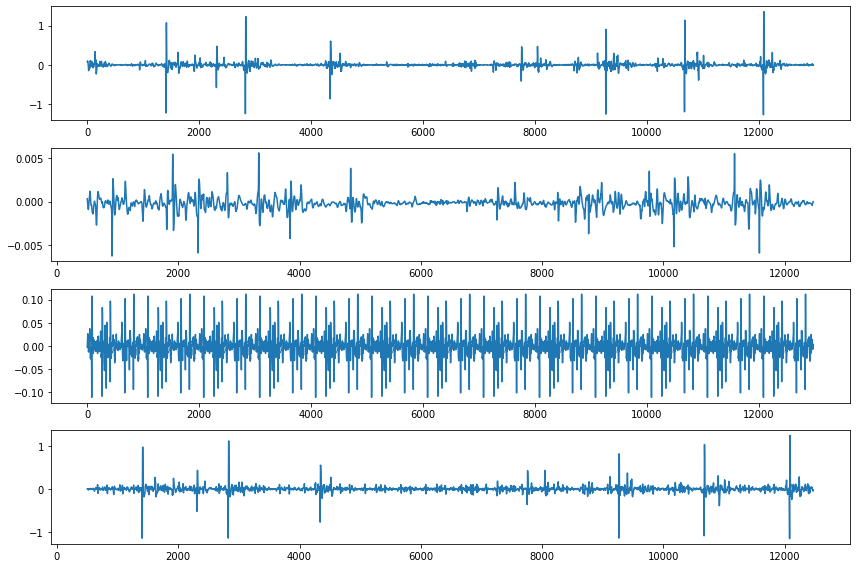

In [ ]:
result = seasonal_decompose(doente['C1 - RF'], freq = 1000)

fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(12,8))
result.observed.plot(ax=ax1)
result.trend.plot(ax=ax2)
result.seasonal.plot(ax=ax3)
result.resid.plot(ax=ax4)
plt.tight_layout()

In [ ]:
acf(doente['C1 - RF'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


array([ 1.00000000e+00,  9.33703715e-01,  7.70085076e-01,  5.63908880e-01,
        3.54321719e-01,  1.68069889e-01,  1.60880702e-02, -9.42011592e-02,
       -1.62245142e-01, -1.95326818e-01, -2.02096119e-01, -1.92484054e-01,
       -1.76172696e-01, -1.60354052e-01, -1.49378606e-01, -1.44998628e-01,
       -1.46852740e-01, -1.53057121e-01, -1.60344274e-01, -1.65673514e-01,
       -1.66778788e-01, -1.63183010e-01, -1.55783317e-01, -1.45598174e-01,
       -1.34356344e-01, -1.23126096e-01, -1.11623542e-01, -1.00212124e-01,
       -8.96679154e-02, -8.03700385e-02, -7.26633114e-02, -6.62839822e-02,
       -6.09791572e-02, -5.62605637e-02, -5.12288414e-02, -4.52468519e-02,
       -3.78389751e-02, -2.93119411e-02, -1.99624921e-02, -9.88226568e-03,
        4.62766765e-04])

# Testes Canal 2

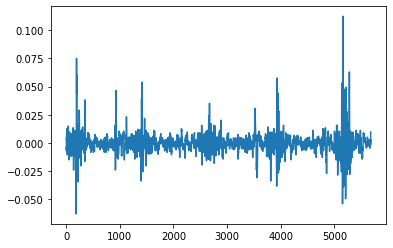

In [ ]:
saudavel['C2 - VF'].plot()

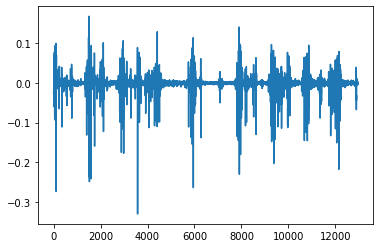

In [ ]:
doente['C2 - VF'].plot()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


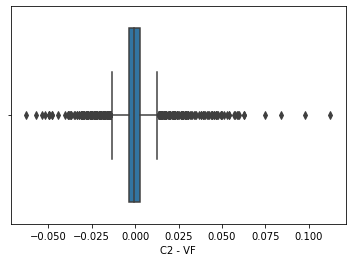

In [ ]:
sns.boxplot(saudavel['C2 - VF'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


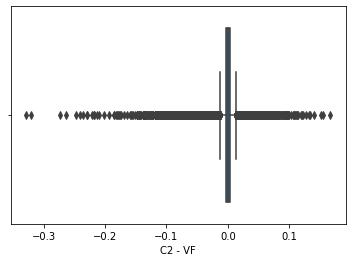

In [ ]:
sns.boxplot(doente['C2 - VF'])

In [ ]:
saudavel['C2 - VF'].isnull().sum()
#este canal tem valores faltantes, vou imputar a media por serem poucos

19

In [ ]:
media = saudavel['C2 - VF'].mean()
saudavel['C2 - VF'].fillna(media, inplace=True)

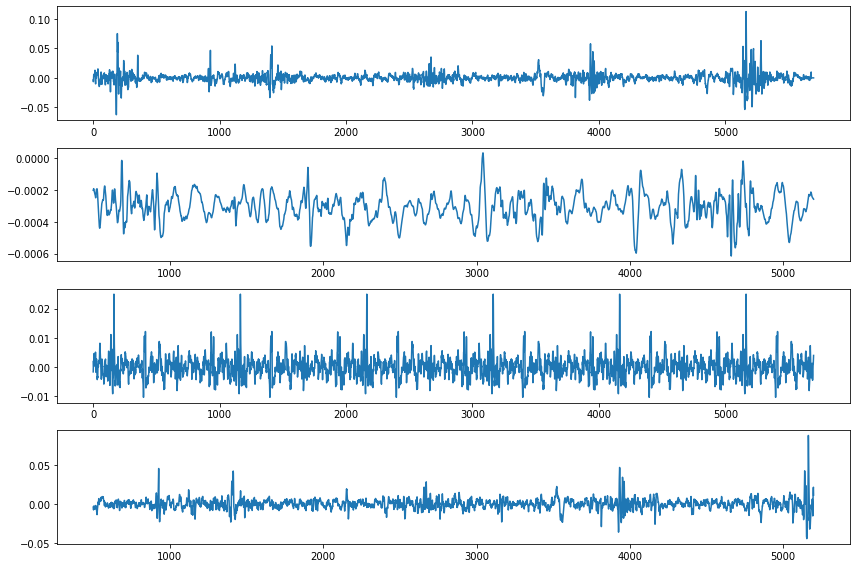

In [ ]:
result = seasonal_decompose(saudavel['C2 - VF'], freq = 1000)

fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(12,8))
result.observed.plot(ax=ax1)
result.trend.plot(ax=ax2)
result.seasonal.plot(ax=ax3)
result.resid.plot(ax=ax4)
plt.tight_layout()

In [ ]:
acf(saudavel['C2 - VF'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


array([ 1.        ,  0.90117929,  0.69790243,  0.48255812,  0.29132629,
        0.14120605,  0.01612456, -0.07706783, -0.14010548, -0.17647969,
       -0.19178241, -0.19835555, -0.19270268, -0.17034113, -0.13298638,
       -0.08896572, -0.04780018, -0.01827666, -0.00187193,  0.00294441,
        0.00101191, -0.00323005, -0.00953479, -0.0137129 , -0.01952257,
       -0.0291455 , -0.04190796, -0.06207333, -0.08638238, -0.1078341 ,
       -0.12164161, -0.1246498 , -0.11806271, -0.10688632, -0.09963846,
       -0.09736562, -0.09394318, -0.08381243, -0.06422304, -0.04179896,
       -0.02885775])

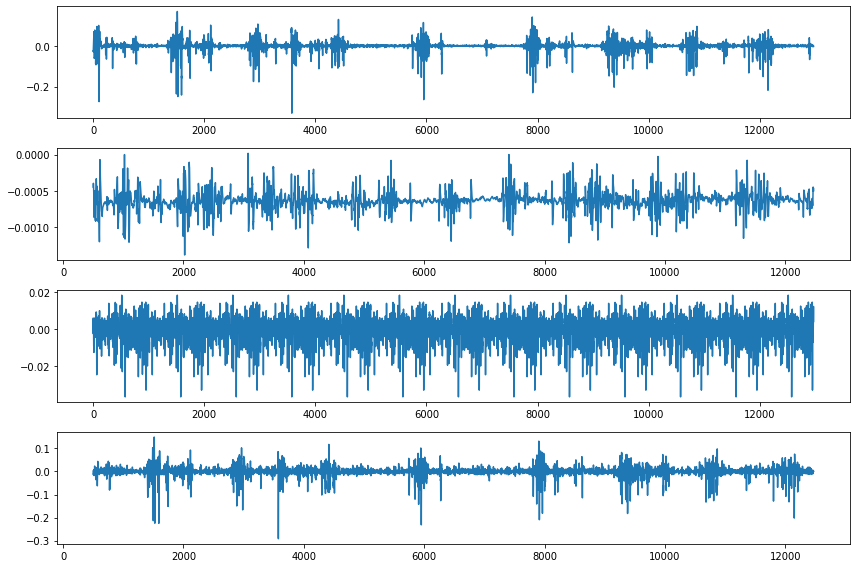

In [ ]:
result = seasonal_decompose(doente['C2 - VF'], freq = 1000)

fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(12,8))
result.observed.plot(ax=ax1)
result.trend.plot(ax=ax2)
result.seasonal.plot(ax=ax3)
result.resid.plot(ax=ax4)
plt.tight_layout()

In [ ]:
acf(doente['C2 - VF'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


array([ 1.        ,  0.85122398,  0.56744459,  0.30565293,  0.09176181,
       -0.06418623, -0.18679533, -0.26952552, -0.30982591, -0.31058998,
       -0.28623075, -0.25249726, -0.21136217, -0.17371447, -0.1467925 ,
       -0.12694836, -0.11022273, -0.09730712, -0.08130955, -0.05768839,
       -0.02873352,  0.00140805,  0.03079374,  0.05786123,  0.0823909 ,
        0.10290221,  0.11121169,  0.10121642,  0.07373388,  0.03905251,
        0.00368036, -0.02877845, -0.05205938, -0.06531474, -0.06970352,
       -0.0674366 , -0.06315582, -0.0590994 , -0.05415033, -0.05084215,
       -0.04539035])

# Testes Canal 3

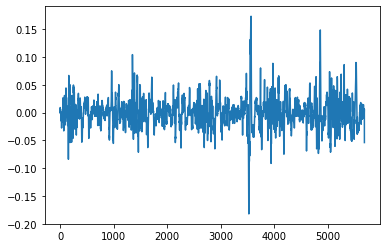

In [ ]:
saudavel['C3 - VM'].plot()

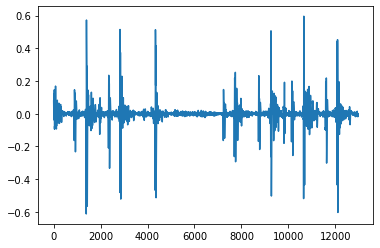

In [ ]:
doente['C3 - VM'].plot()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


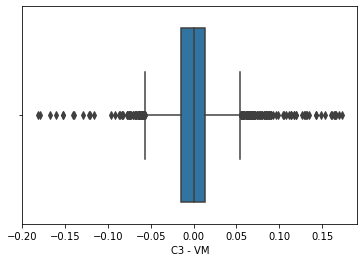

In [ ]:
sns.boxplot(saudavel['C3 - VM'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


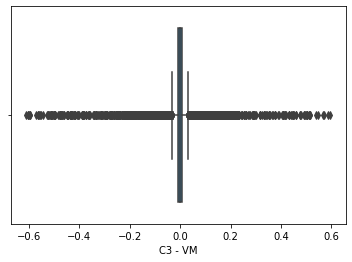

In [ ]:
sns.boxplot(doente['C3 - VM'])

In [ ]:
saudavel['C3 - VM'].isnull().sum()

19

In [ ]:
media = saudavel['C3 - VM'].mean()
saudavel['C3 - VM'].fillna(media, inplace=True)

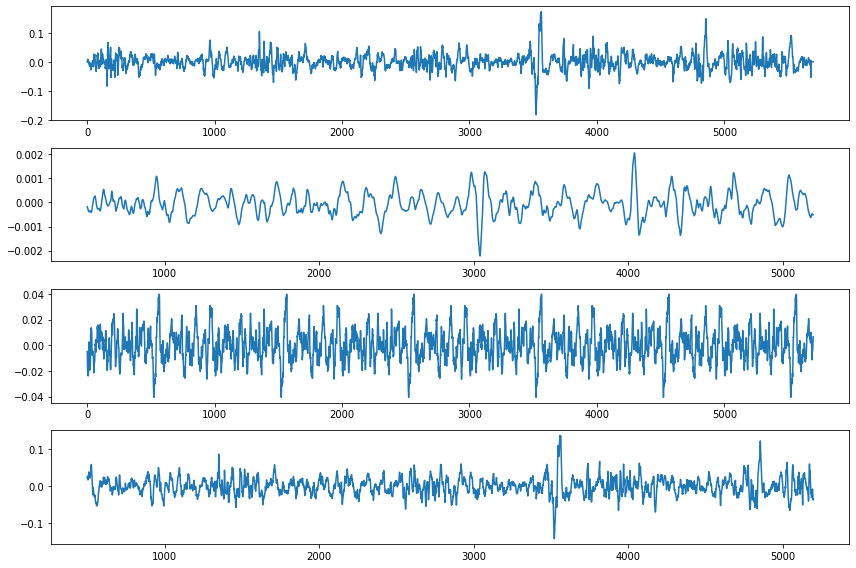

In [ ]:
result = seasonal_decompose(saudavel['C3 - VM'], freq = 1000)

fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(12,8))
result.observed.plot(ax=ax1)
result.trend.plot(ax=ax2)
result.seasonal.plot(ax=ax3)
result.resid.plot(ax=ax4)
plt.tight_layout()

In [ ]:
acf(saudavel['C3 - VM'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


array([ 1.        ,  0.96090655,  0.88317956,  0.79734117,  0.7097195 ,
        0.62859179,  0.55150291,  0.47855101,  0.40775215,  0.34528372,
        0.28978531,  0.2365117 ,  0.18832471,  0.14590395,  0.10875809,
        0.07497592,  0.04503172,  0.01281906, -0.02186573, -0.05340448,
       -0.08312767, -0.11157754, -0.14126831, -0.17124203, -0.19953592,
       -0.22239526, -0.23452889, -0.24096673, -0.2446121 , -0.24722883,
       -0.25168665, -0.25658013, -0.2592877 , -0.25869731, -0.25821081,
       -0.25591535, -0.25041437, -0.24381801, -0.23763456, -0.23353179,
       -0.22898641])

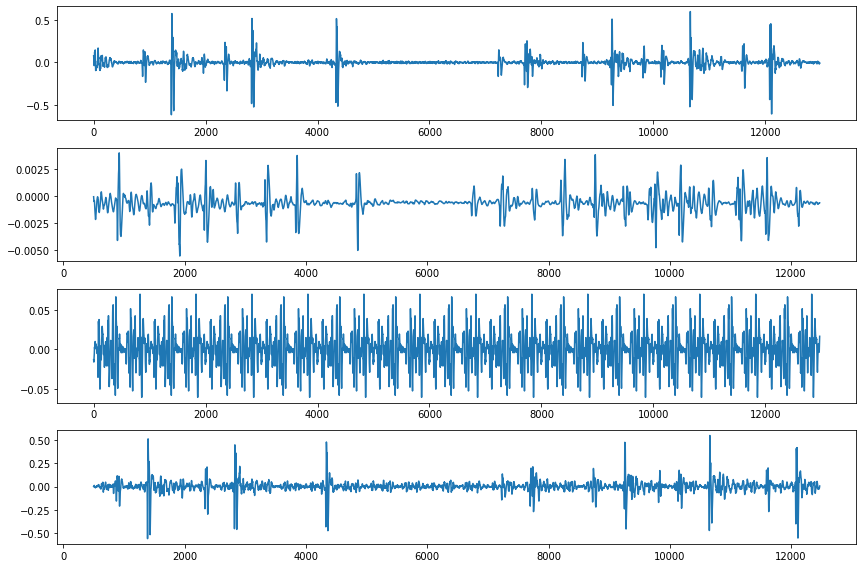

In [ ]:
result = seasonal_decompose(doente['C3 - VM'], freq = 1000)

fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(12,8))
result.observed.plot(ax=ax1)
result.trend.plot(ax=ax2)
result.seasonal.plot(ax=ax3)
result.resid.plot(ax=ax4)
plt.tight_layout()

In [ ]:
acf(doente['C3 - VM'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


array([ 1.        ,  0.97569461,  0.90955228,  0.81387557,  0.70130297,
        0.58364759,  0.46953847,  0.36508552,  0.27316981,  0.19395739,
        0.12593665,  0.06683487,  0.01443388, -0.03341949, -0.07890813,
       -0.12350495, -0.16715456, -0.20923195, -0.24877428, -0.28474145,
       -0.31619553, -0.34219615, -0.36242117, -0.37709873, -0.38673486,
       -0.39196119, -0.39306762, -0.3899463 , -0.3825667 , -0.37112302,
       -0.35607464, -0.33801855, -0.31745301, -0.29502709, -0.27155347,
       -0.24774305, -0.22410876, -0.20107077, -0.17902619, -0.15824415,
       -0.13895672])

# Testes Canal 4

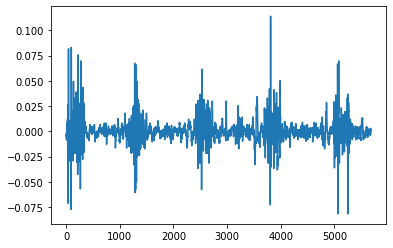

In [ ]:
saudavel['C4 - ST'].plot()

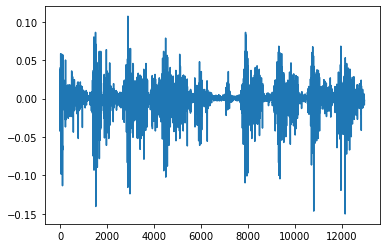

In [ ]:
doente['C4 - ST'].plot()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


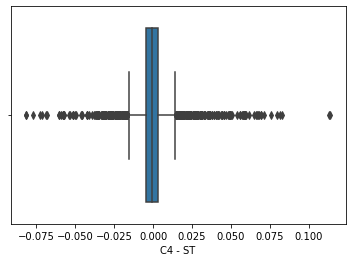

In [ ]:
sns.boxplot(saudavel['C4 - ST'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


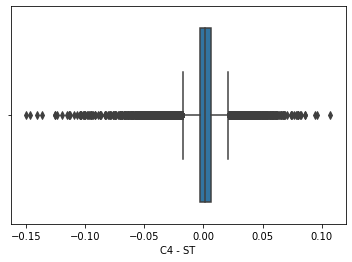

In [ ]:
sns.boxplot(doente['C4 - ST'])

In [ ]:
saudavel['C4 - ST'].isnull().sum()
#canal 4 tbm tinha 19 valores faltantes, talvez esses valores que estão fazendo o gráfico do canal 1 ficar estranho

19

In [ ]:
media = saudavel['C4 - ST'].mean()
saudavel['C4 - ST'].fillna(media, inplace=True)

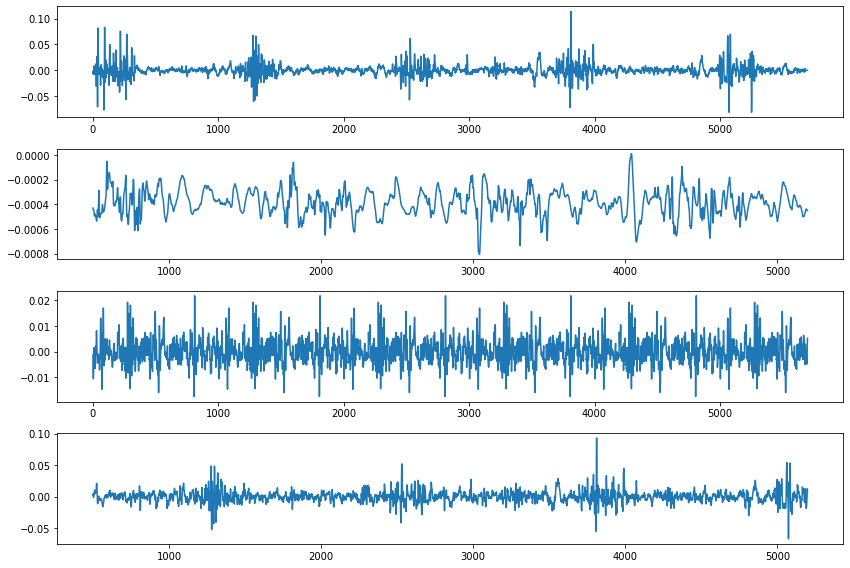

In [ ]:
result = seasonal_decompose(saudavel['C4 - ST'], freq = 1000)

fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(12,8))
result.observed.plot(ax=ax1)
result.trend.plot(ax=ax2)
result.seasonal.plot(ax=ax3)
result.resid.plot(ax=ax4)
plt.tight_layout()

In [ ]:
acf(saudavel['C4 - ST'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


array([ 1.00000000e+00,  8.63899108e-01,  5.66211068e-01,  2.57489109e-01,
        2.08258195e-02, -9.26198615e-02, -9.27272359e-02, -3.58123883e-02,
        1.04780609e-02,  1.48589101e-02, -1.46787290e-02, -5.17198905e-02,
       -7.14414871e-02, -7.42120141e-02, -6.78510570e-02, -5.87708008e-02,
       -5.32266477e-02, -5.48141455e-02, -5.61435273e-02, -4.59235721e-02,
       -2.54346703e-02, -5.00223177e-03,  1.86586103e-03, -8.30521577e-03,
       -2.88138247e-02, -5.19181113e-02, -7.19024020e-02, -8.33769927e-02,
       -7.89163545e-02, -6.28555005e-02, -4.74083199e-02, -3.90843640e-02,
       -3.76032395e-02, -3.97152197e-02, -4.27024407e-02, -3.79456953e-02,
       -2.02968052e-02,  5.61706593e-04,  1.01519115e-02,  1.36707618e-03,
       -2.44037536e-02])

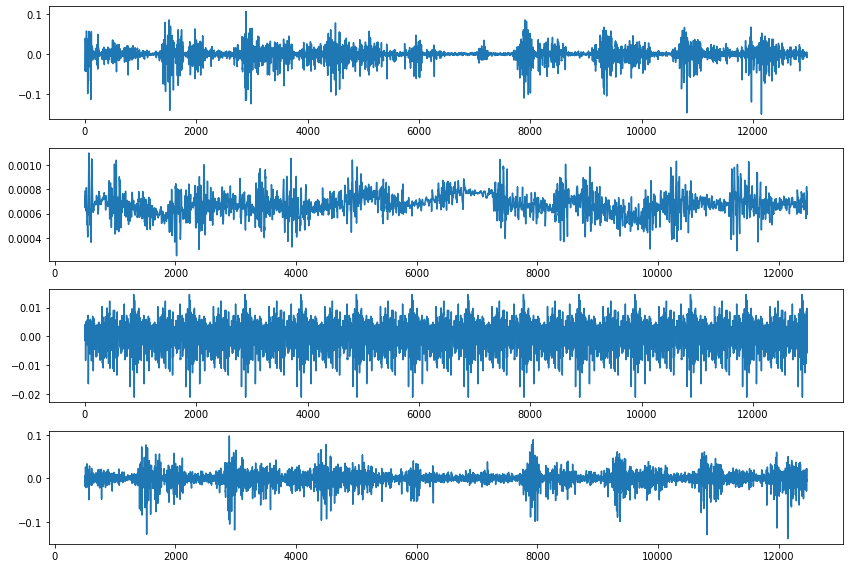

In [ ]:
result = seasonal_decompose(doente['C4 - ST'], freq = 1000)

fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(12,8))
result.observed.plot(ax=ax1)
result.trend.plot(ax=ax2)
result.seasonal.plot(ax=ax3)
result.resid.plot(ax=ax4)
plt.tight_layout()

In [ ]:
acf(doente['C4 - ST'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


array([ 1.        ,  0.83478576,  0.49684642,  0.17406449, -0.06538126,
       -0.19089907, -0.23526219, -0.23567649, -0.22108988, -0.20220784,
       -0.17261642, -0.13593866, -0.09722004, -0.0660445 , -0.04954464,
       -0.04776682, -0.05498377, -0.06476368, -0.07054234, -0.07268564,
       -0.07493058, -0.07342993, -0.06420322, -0.04289351, -0.0133372 ,
        0.01630241,  0.03918103,  0.04570798,  0.03664594,  0.01549847,
       -0.01299261, -0.033721  , -0.03874256, -0.03285704, -0.02327064,
       -0.01748699, -0.01744243, -0.01755044, -0.01244397, -0.0011964 ,
        0.01128577])

# Boxplots gerais

In [ ]:
s1 = pd.read_csv('/content/drive/MyDrive/BancodeDadosIC - Joelho/1Nmar.txt', sep="\s+")
s1.columns=['C1 - RF', 'C2 - VF', 'C3 - VM', 'C4 - ST', 'C5 - FX']
s2 = pd.read_csv('/content/drive/MyDrive/BancodeDadosIC - Joelho/2Nmar.txt', sep="\s+")
s2.columns=['C1 - RF', 'C2 - VF', 'C3 - VM', 'C4 - ST', 'C5 - FX']
s3 = pd.read_csv('/content/drive/MyDrive/BancodeDadosIC - Joelho/3Nmar.txt', sep="\s+")
s3.columns=['C1 - RF', 'C2 - VF', 'C3 - VM', 'C4 - ST', 'C5 - FX']
s4 = pd.read_csv('/content/drive/MyDrive/BancodeDadosIC - Joelho/4Nmar.txt', sep="\s+")
s4.columns=['C1 - RF', 'C2 - VF', 'C3 - VM', 'C4 - ST', 'C5 - FX']
s5 = pd.read_csv('/content/drive/MyDrive/BancodeDadosIC - Joelho/5Nmar.txt', sep="\s+")
s5.columns=['C1 - RF', 'C2 - VF', 'C3 - VM', 'C4 - ST', 'C5 - FX']
s6 = pd.read_csv('/content/drive/MyDrive/BancodeDadosIC - Joelho/6Nmar.txt', sep="\s+")
s6.columns=['C1 - RF', 'C2 - VF', 'C3 - VM', 'C4 - ST', 'C5 - FX']
s7 = pd.read_csv('/content/drive/MyDrive/BancodeDadosIC - Joelho/7Nmar.txt', sep="\s+")
s7.columns=['C1 - RF', 'C2 - VF', 'C3 - VM', 'C4 - ST', 'C5 - FX']
s8 = pd.read_csv('/content/drive/MyDrive/BancodeDadosIC - Joelho/8Nmar.txt', sep="\s+")
s8.columns=['C1 - RF', 'C2 - VF', 'C3 - VM', 'C4 - ST', 'C5 - FX']
s9 = pd.read_csv('/content/drive/MyDrive/BancodeDadosIC - Joelho/9Nmar.txt', sep="\s+")
s9.columns=['C1 - RF', 'C2 - VF', 'C3 - VM', 'C4 - ST', 'C5 - FX']
s10 = pd.read_csv('/content/drive/MyDrive/BancodeDadosIC - Joelho/10Nmar.txt', sep="\s+")
s10.columns=['C1 - RF', 'C2 - VF', 'C3 - VM', 'C4 - ST', 'C5 - FX']
s11 = pd.read_csv('/content/drive/MyDrive/BancodeDadosIC - Joelho/11Nmar.txt', sep="\s+")
s11.columns=['C1 - RF', 'C2 - VF', 'C3 - VM', 'C4 - ST', 'C5 - FX']

In [ ]:
d1 = pd.read_csv('/content/drive/MyDrive/BancodeDadosIC - Joelho/1Amar.txt', sep="\s+")
d1.columns=['C1 - RF', 'C2 - VF', 'C3 - VM', 'C4 - ST', 'C5 - FX']
d2 = pd.read_csv('/content/drive/MyDrive/BancodeDadosIC - Joelho/2Amar.txt', sep="\s+")
d2.columns=['C1 - RF', 'C2 - VF', 'C3 - VM', 'C4 - ST', 'C5 - FX']
d3 = pd.read_csv('/content/drive/MyDrive/BancodeDadosIC - Joelho/3Amar.txt', sep="\s+")
d3.columns=['C1 - RF', 'C2 - VF', 'C3 - VM', 'C4 - ST', 'C5 - FX']
d4 = pd.read_csv('/content/drive/MyDrive/BancodeDadosIC - Joelho/4Amar.txt', sep="\s+")
d4.columns=['C1 - RF', 'C2 - VF', 'C3 - VM', 'C4 - ST', 'C5 - FX']
d5 = pd.read_csv('/content/drive/MyDrive/BancodeDadosIC - Joelho/5Amar.txt', sep="\s+")
d5.columns=['C1 - RF', 'C2 - VF', 'C3 - VM', 'C4 - ST', 'C5 - FX']
d6 = pd.read_csv('/content/drive/MyDrive/BancodeDadosIC - Joelho/6Amar.txt', sep="\s+")
d6.columns=['C1 - RF', 'C2 - VF', 'C3 - VM', 'C4 - ST', 'C5 - FX']
d7 = pd.read_csv('/content/drive/MyDrive/BancodeDadosIC - Joelho/7Amar.txt', sep="\s+")
d7.columns=['C1 - RF', 'C2 - VF', 'C3 - VM', 'C4 - ST', 'C5 - FX']
d8 = pd.read_csv('/content/drive/MyDrive/BancodeDadosIC - Joelho/8Amar.txt', sep="\s+")
d8.columns=['C1 - RF', 'C2 - VF', 'C3 - VM', 'C4 - ST', 'C5 - FX']
d9 = pd.read_csv('/content/drive/MyDrive/BancodeDadosIC - Joelho/9Amar.txt', sep="\s+")
d9.columns=['C1 - RF', 'C2 - VF', 'C3 - VM', 'C4 - ST', 'C5 - FX', 'A']
d10 = pd.read_csv('/content/drive/MyDrive/BancodeDadosIC - Joelho/10Amar.txt', sep="\s+")
d10.columns=['C1 - RF', 'C2 - VF', 'C3 - VM', 'C4 - ST', 'C5 - FX', 'A']
d11 = pd.read_csv('/content/drive/MyDrive/BancodeDadosIC - Joelho/11Amar.txt', sep="\s+")
d11.columns=['C1 - RF', 'C2 - VF', 'C3 - VM', 'C4 - ST', 'C5 - FX', 'A']

# Plotagem dos boxplots - Canal 1

Aqui devo fazer um slice até a amostra 5300 e fazer os boxplots.

Depois devo tentar juntar todos numa imagem só.

In [ ]:
saudaveis = [s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11]
fig, ax = plt.subplots(nrows=1 , ncols=11, figsize=(14,10))

i = 0
for saud in saudaveis:
  sns.boxplot(ax=ax[i], y=saud['C1 - RF'][:5300])
  ax[i].set_ylabel('')
  #ax[i].set_yticks(ticks=[-1.2,1.2])
  ax[i].set_xlabel(i+1)
  i += 1


fig.tight_layout()
fig.savefig('saudavelcanal1.png')

In [ ]:
fig, ax = plt.subplots(nrows=1 , ncols=11, figsize=(14,10))
doentes = [d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11]

i = 0
for doente in doentes:
  sns.boxplot(ax=ax[i], y=doente['C1 - RF'][:5300])
  ax[i].set_ylabel('')
  #ax[i].set_yticks(ticks=[-1.2,1.2])
  ax[i].set_xlabel(i+1)
  i += 1

fig.tight_layout()
fig.savefig('doentescanal1.png')

In [ ]:
saudaveis = [s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11]
fig, ax = plt.subplots(nrows=1 , ncols=11, figsize=(14,6))

i = 0
for saud in saudaveis:
  sns.boxplot(ax=ax[i], y=saud['C1 - RF'][:5300])
  ax[i].set_ylabel('')
  #ax[i].set_yticks(ticks=[-1.2,1.2])
  i += 1

fig.tight_layout()


In [ ]:
fig, ax = plt.subplots(nrows=1 , ncols=11, figsize=(14,6))

i = 0
for doente in doentes:
  sns.boxplot(ax=ax[i], y=doente['C1 - RF'][:5300])
  ax[i].set_ylabel('')
  ax[i].set_yticks(ticks=[-1.2,1.2])
  ax[i].set_xlabel(i+1)
  i += 1

fig.tight_layout()

# Plotagem dos boxplots - Canal 2


In [ ]:
fig, ax = plt.subplots(nrows=1 , ncols=11, figsize=(14,10))

i = 0
for saud in saudaveis:
  sns.boxplot(ax=ax[i], y=saud['C2 - VF'][:5300])
  ax[i].set_ylabel('')
  ax[i].set_xlabel(i+1)
  i += 1

fig.tight_layout()
fig.savefig('saudaveiscanal2')

In [ ]:
fig, ax = plt.subplots(nrows=1 , ncols=11, figsize=(14,10))

i = 0
for doente in doentes:
  sns.boxplot(ax=ax[i], y=doente['C2 - VF'][:5300])
  ax[i].set_ylabel('')
  ax[i].set_xlabel(i+1)
  i += 1

fig.tight_layout()
fig.savefig('doentecanal2.png')

# Plotagem dos boxplots - Canal 3

In [ ]:
fig, ax = plt.subplots(nrows=1 , ncols=11, figsize=(14,10))

i = 0
for saud in saudaveis:
  sns.boxplot(ax=ax[i], y=saud['C3 - VM'][:5300])
  ax[i].set_ylabel('')
  ax[i].set_xlabel(i+1)
  i += 1

fig.tight_layout()
fig.savefig('saudaveiscanal3.png')

In [ ]:
fig, ax = plt.subplots(nrows=1 , ncols=11, figsize=(14,10))

i = 0
for doente in doentes:
  sns.boxplot(ax=ax[i], y=doente['C3 - VM'][:5300])
  ax[i].set_ylabel('')
  ax[i].set_xlabel(i+1)
  i += 1

fig.tight_layout()
fig.savefig('doentescanal3')

# Plotagem dos boxplots - Canal 4

In [ ]:
fig, ax = plt.subplots(nrows=1 , ncols=11, figsize=(14,10))

i = 0
for saud in saudaveis:
  sns.boxplot(ax=ax[i], y=saud['C4 - ST'][:5300])
  ax[i].set_ylabel('')
  ax[i].set_xlabel(i+1)
  i += 1

fig.tight_layout()
fig.savefig('saudaveiscanal4')

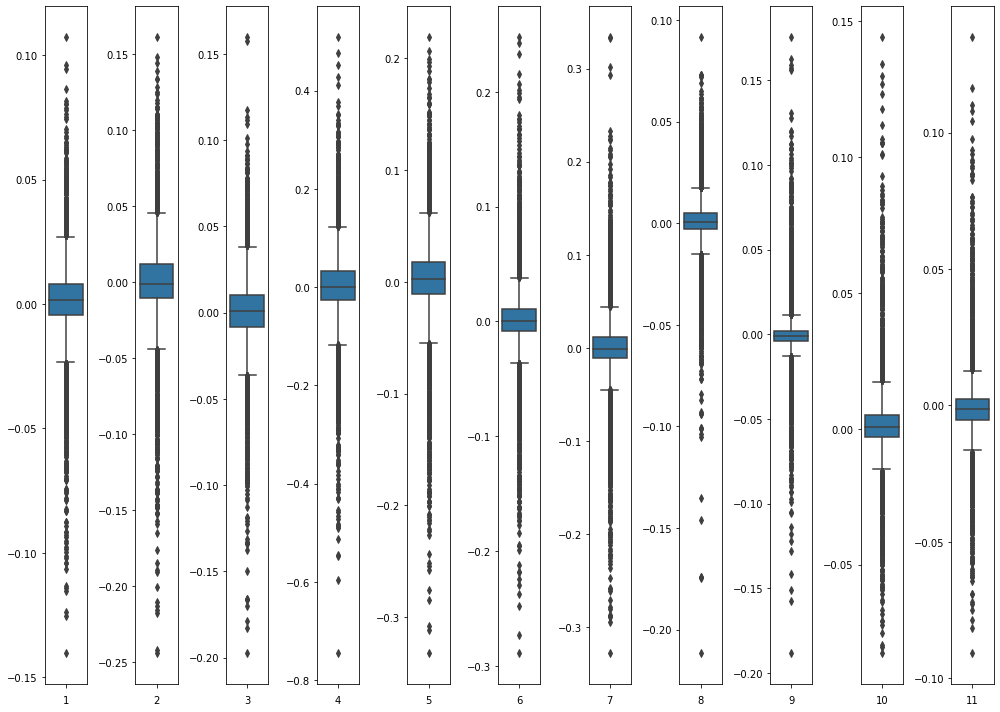

In [ ]:
fig, ax = plt.subplots(nrows=1 , ncols=11, figsize=(14,10))

i = 0
for doente in doentes:
  sns.boxplot(ax=ax[i], y=doente['C4 - ST'][:5300])
  ax[i].set_ylabel('')
  ax[i].set_xlabel(i+1)
  i += 1

fig.tight_layout()
fig.savefig('doentescanal4.png')